<a href="https://colab.research.google.com/github/jhonoratoc/cursos-alura/blob/main/F01C05_Pandas_Formatos_diferentes_de_entrada_e_sa%C3%ADda_(IO).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=navyblue> AULA 01 - Alunas e alunos com JSON

## 1) Lendo nomes com JSON

In [ ]:
## não temos nenhum arquivo pra começar o curso
## precisamos fazer o upload de um banco de dados

## procuremos uma API do IBGE com nomes de pessoas
## usemos a API de ranking de nomes
## https://servicodados.ibge.gov.br/api/v2/censos/nomes/ranking

## usemos a v1
## https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking

## que tal usarmos 200 nomes, sendo todos de MULHERES?
## https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f

## que tal usarmos 200 nomes, sendo todos de HOMENS?
## https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m

In [ ]:
## comecemos a manipular esses dados

import pandas as pd

## lendo os dados femininos
nomes_f = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f")
nomes_m = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m")

In [ ]:
## os nomes estão em variáveis diferentes, divididas pelo sexo
## que tal a gente juntar tudo num único DataFrame?

## usaremos a função concat([df1, df2])

## algumas colunas não serão úteis para o que eu quero
## eu só quero a coluna nome no meu dataframe

nomes = pd.concat([nomes_f, nomes_m])['nome'].to_frame()  ## outra forma de transformar em df é usando colchetes duplos em [['nome']]
nomes

,nome
0,MARIA
1,ANA
2,FRANCISCA
3,ANTONIA
4,ADRIANA
...,...
195,WALTER
196,ARLINDO
197,MICHAEL
198,ALVARO


In [ ]:
## peguemos 5 nomes aleatórios usando a função df.sample()

nomes.sample(5)

,nome
34,CRISTIANE
178,DENILSON
111,CLEITON
45,ANDREIA
11,GABRIEL


## 2) Incluindo ID dos alunos

In [ ]:
## fizemos o df com os nomes, mas o nome não é o único dado necessário para matricular alunos e alunas no colégio
## vamos criar IDs para os alunos -- códigos que os identifiquem
## esses IDs serão gerados de forma aleatória (até porque são 400 alunos)

## usaremos o numpy para criar essa lista de IDs

import numpy as np

In [ ]:
## vamos estabelecer uma random seed
## a seed serve pra "travar" a aleatoriedade dos valores, que sempre começarão a ser gerados a partir de um mesmo número inicial
## o número não tem importância, pode ser qualquer um

np.random.seed(123)

In [ ]:
nomes['id_aluno'] = np.random.permutation(len(nomes)) + 1 

## a função retorna um array contendo len(nomes) (400 valores), de 0 a 399, distribuídos em posições aleatórias
## para que os valores fossem de 1 a 400, foi necessário somar em 1 o array gerado

nomes.index = range(len(nomes))

nomes

,nome,id_aluno
0,MARIA,235
1,ANA,43
2,FRANCISCA,304
3,ANTONIA,156
4,ADRIANA,343
...,...,...
395,WALTER,231
396,ARLINDO,99
397,MICHAEL,323
398,ALVARO,383


In [ ]:
## outro dado pedido pela direção da escola é o e-mail do aluno
## vamos criar e-mails fictícios para os alunos 

dominios = ['@aemail.com.br', '@bemail.com']

## vamos juntar o nome do aluno com algum dos domínios de e-mail criados

nomes['dominio'] = np.random.choice(a=dominios, size=len(nomes))
## esse comando gera um array numpy, de tamanho size=400, contendo cópias dos elementos de a=dominios, escolhidas aleatoriamente
## na lista dominios, existem dois elementos; o comando vai escolher, 400 vezes, um dentre esses dois elementos e adicionará ao array numpy resultante

nomes['dominio'].value_counts()
## abaixo, nota-se a quantidade de vezes que cada um dos elementos foi escolhido

@bemail.com       206
@aemail.com.br    194
Name: dominio, dtype: int64

In [ ]:
nomes.head(10)  ## nosso próximo passo é juntar o nome com o domínio e formar os e-mails dos alunos

,nome,id_aluno,dominio
0,MARIA,235,@aemail.com.br
1,ANA,43,@bemail.com
2,FRANCISCA,304,@bemail.com
3,ANTONIA,156,@bemail.com
4,ADRIANA,343,@bemail.com
5,JULIANA,310,@aemail.com.br
6,MARCIA,55,@aemail.com.br
7,FERNANDA,288,@aemail.com.br
8,PATRICIA,379,@bemail.com
9,ALINE,92,@bemail.com


In [ ]:
## criemos uma nova coluna para armazenar os e-mails dos alunos

nomes['email'] = (nomes['nome'] + nomes['dominio']).str.lower()
## junta nome com domínio, aplica propriedades de string na coluna (.str) (Series não podem receber atributos de strings, são coisas diferentes)
## e transforma todas as letras em minúsculas (.lower())

nomes.head(10)

,nome,id_aluno,dominio,email
0,MARIA,235,@aemail.com.br,maria@aemail.com.br
1,ANA,43,@bemail.com,ana@bemail.com
2,FRANCISCA,304,@bemail.com,francisca@bemail.com
3,ANTONIA,156,@bemail.com,antonia@bemail.com
4,ADRIANA,343,@bemail.com,adriana@bemail.com
5,JULIANA,310,@aemail.com.br,juliana@aemail.com.br
6,MARCIA,55,@aemail.com.br,marcia@aemail.com.br
7,FERNANDA,288,@aemail.com.br,fernanda@aemail.com.br
8,PATRICIA,379,@bemail.com,patricia@bemail.com
9,ALINE,92,@bemail.com,aline@bemail.com


# <font color=navyblue> AULA 02 - Criando cursos lendo html

## 1) Criando cursos

In [ ]:
## existem 400 alunos cadastrados, cada qual com seu nome, número de ID e e-mail
## porém, nenhum deles está matriculado em algum curso

## mas antes, instalemos duas bibliotecas: a html5lib e a lxml.

!pip3 install html5lib
!pip3 install lxml

In [ ]:
## importemos uma tabela html de uma url

cursos = pd.read_html('http://tabela-cursos.herokuapp.com/index.html')
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [ ]:
type(cursos)  ## cursos é uma lista; devemos transformar num dataframe

list

In [ ]:
cursos[0]  ## cursos[0] transformou a lista em um df

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python
5,PHP com MySql
6,.NET para web
7,Novas integrações com Java
8,TDD com Java
9,Código limpo com C#


In [ ]:
cursos = cursos[0]  ## guardando o df na variável cursos

In [ ]:
type(cursos)  ## cursos é um df

pandas.core.frame.DataFrame

## 2) Alterando o index

In [ ]:
## no df cursos, o título da coluna 'Nome do curso' possui espaços
## vamos alterá-lo, de modo que os espaços sejam substituídos por _

cursos.columns = ['nome_do_curso']
cursos

## outra forma de fazer:
## cursos.rename(columns = {'Nome do curso': 'Nome_do_curso'}, inplace=True)

,nome_do_curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python
5,PHP com MySql
6,.NET para web
7,Novas integrações com Java
8,TDD com Java
9,Código limpo com C#


In [ ]:
## utilizando o np.random.permutation, vamos criar o ID para os cursos

cursos['id_curso'] = cursos.index + 1
cursos

,nome_do_curso,id_curso
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5
5,PHP com MySql,6
6,.NET para web,7
7,Novas integrações com Java,8
8,TDD com Java,9
9,Código limpo com C#,10


In [ ]:
## e se a coluna id_cursos fosse o nosso index?

cursos.set_index(['id_curso'], inplace = True)
cursos

,nome_do_curso
id_curso,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python
6,PHP com MySql
7,.NET para web
8,Novas integrações com Java
9,TDD com Java


# <font color=navyblue> AULA 03 - Escrevendo csv, json e html

## 1) Matriculando alunas e alunos

In [ ]:
## vamos matricular os alunos nos cursos ofertados
## normalmente, a maioria dos alunos faz um único curso
## um número menor de alunos faz dois cursos
## um número menor ainda faz mais de dois cursos

## criemos uma coluna 'matriculas'
## para que poucos alunos sejam matriculados em muitos cursos, distribuiremos o número de cursos de acordo com uma função exponencial aleatória
## para isso, usaremos a função np.random.exponential

nomes['matriculas'] = np.ceil(np.random.exponential(size=len(nomes)) * 1.5).astype(int)
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
93,ELIANA,372,@bemail.com,eliana@bemail.com,1
398,ALVARO,383,@bemail.com,alvaro@bemail.com,3
263,MIGUEL,239,@bemail.com,miguel@bemail.com,2
374,DENIS,69,@bemail.com,denis@bemail.com,1
269,REGINALDO,170,@aemail.com.br,reginaldo@aemail.com.br,1


In [ ]:
nomes['matriculas'].describe()

## a distribuição do número de matrículas por aluno

count    400.000000
mean       2.137500
std        1.511392
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        9.000000
Name: matriculas, dtype: float64

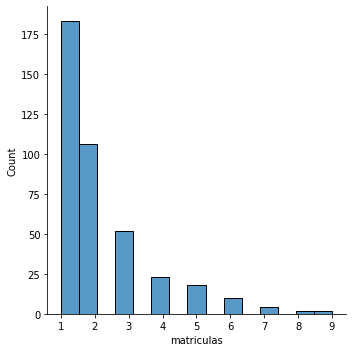

In [ ]:
## que tal uma representação gráfica para demonstrar a distribuição?

import seaborn as sns
sns.displot(data=nomes['matriculas'])

In [ ]:
nomes['matriculas'].value_counts(sort=True)

1    183
2    106
3     52
4     23
5     18
6     10
7      4
9      2
8      2
Name: matriculas, dtype: int64

## 2) Selecionando os cursos

In [ ]:
## sabemos a quantidade de cursos de cada aluno
## mas quais são os cursos para os quais cada aluno está matriculado?

todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)

In [ ]:
for index, row in nomes.iterrows():
  id = row.id_aluno
  matriculas = row.matriculas
  for i in range(matriculas):
    mat = [id, np.random.choice(cursos.index, p = prob)]
    todas_matriculas.append(mat)

matriculas = pd.DataFrame(todas_matriculas, columns = ['id_aluno', 'id_curso'])
matriculas.head(5)

,id_aluno,id_curso
0,235,19
1,235,8
2,235,10
3,43,19
4,304,16


In [ ]:
matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno':'quantidade_de_alunos'})

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,49,Lógica de programação
2,2,Java para Web
3,76,C# para Web
4,8,Ruby on Rails
5,55,Cursos de Python
6,36,PHP com MySql
7,63,.NET para web
8,63,Novas integrações com Java
9,13,TDD com Java


In [ ]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno':'quantidade_de_alunos'})

## 3) Saída em diferentes formatos

In [ ]:
## vamos exportar os df para csv

matriculas_por_curso.to_csv('matriculas_por_curso.csv', index=False)

In [ ]:
## e se eu quiser transformar em json?

matriculas_json = matriculas_por_curso.to_json()
matriculas_json

'{"quantidade_de_alunos":{"1":49,"2":2,"3":76,"4":8,"5":55,"6":36,"7":63,"8":63,"9":13,"10":46,"11":33,"12":70,"13":42,"14":52,"15":24,"16":45,"17":27,"18":73,"19":76,"20":2},"nome_do_curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [ ]:
matriculas_html = matriculas_por_curso.to_html()
matriculas_html

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>quantidade_de_alunos</th>\n      <th>nome_do_curso</th>\n    </tr>\n    <tr>\n      <th>id_curso</th>\n      <th></th>\n      <th></th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>1</th>\n      <td>49</td>\n      <td>Lógica de programação</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>2</td>\n      <td>Java para Web</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>76</td>\n      <td>C# para Web</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>8</td>\n      <td>Ruby on Rails</td>\n    </tr>\n    <tr>\n      <th>5</th>\n      <td>55</td>\n      <td>Cursos de Python</td>\n    </tr>\n    <tr>\n      <th>6</th>\n      <td>36</td>\n      <td>PHP com MySql</td>\n    </tr>\n    <tr>\n      <th>7</th>\n      <td>63</td>\n      <td>.NET para web</td>\n    </tr>\n    <tr>\n      <th>8</th>\n      <td>63</td>\n      <td>Novas integrações com Java</td>\n  

# <font color=navyblue> AULA 04 - Lendo e escrevendo html

## 1) Criando o banco SQL

In [ ]:
## precisamos salvar os dataframes criados em um banco de dados local
## para isso, utilizaremos um banco SQL

## importando e instalando uma biblioteca SQL

!pip install sqlalchemy

In [ ]:
## vamos importar algumas libs do sqlalchemy

from sqlalchemy import create_engine, MetaData, Table

## feita a importação, é necessário criar a nossa engine com o caminho do banco de dados
## caso o nosso banco fosse do tipo MySQL ou Postgres, teríamos que instalar outra biblioteca para lê-lo
## como estamos usando o SQLite, que vem nativamente no Colab, não há essa necessidade

In [ ]:
## criemos então uma variável engine

engine = create_engine('sqlite:///:memory:')     ## traduzindo: criando a engine do banco de dados e salvando na memória local
engine

Engine(sqlite:///:memory:)

In [ ]:
type(engine)

sqlalchemy.engine.base.Engine

In [ ]:
## agora devemos exportar o df para SQL usando a engine criada

matriculas_por_curso.to_sql('matriculas', engine)

## 2) Buscando no banco

In [ ]:
## agora que temos a tabela de matrículas no banco, queremos realizar uma busca nesta tabela a partir de uma query SQL

query = 'select * from matriculas where quantidade_de_alunos < 20'  ## esse asterisco (*) 
pd.read_sql(query, engine)

,id_curso,quantidade_de_alunos,nome_do_curso
0,2,2,Java para Web
1,4,8,Ruby on Rails
2,9,13,TDD com Java
3,20,2,Orientação objetos com Java


In [ ]:
muitas_matriculas = pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_de_alunos'])

In [ ]:
## fazendo uma query do pandas

muitas_matriculas = muitas_matriculas.query('quantidade_de_alunos > 60')
muitas_matriculas

,nome_do_curso,quantidade_de_alunos
2,C# para Web,76
6,.NET para web,63
7,Novas integrações com Java,63
11,Hardware básico,70
17,Programação funcional,73
18,Boas práticas em Java,76


In [ ]:
## exportando essa tabela pós-query para a nossa base de dados local

muitas_matriculas.to_sql('muitas_matriculas', con=engine)

In [ ]:
## vejamos quantas tabelas estão salvas na base de dados local

print(engine.table_names())

['matriculas', 'muitas_matriculas']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  This is separate from the ipykernel package so we can avoid doing imports until


# <font color=navyblue> AULA 05 - Lendo e escrevendo excel

## 1) Nomes da próxima turma

In [ ]:
## exportaremos os dados para uma planilha do excel
## façamos isso em duas etapas:
  ## escolher um curso e descobrir quais são os alunos desse curso -- vamos escolher o curso Análise de dados
  ## 

## relembremos quais os dfs que nós temos no nosso projeto:
matriculas_por_curso  ## contendo os cursos e o número de alunos por curso

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,49,Lógica de programação
2,2,Java para Web
3,76,C# para Web
4,8,Ruby on Rails
5,55,Cursos de Python
6,36,PHP com MySql
7,63,.NET para web
8,63,Novas integrações com Java
9,13,TDD com Java


In [ ]:
## o curso escolhido (Análise de dados) tem como id o número 15 e possui 24 alunos

## outro df que já está no nosso projeto é o matriculas
matriculas.head(10)  ## possui o id do aluno e em qual/quais curso/cursos tal aluno está matriculado

,id_aluno,id_curso
0,235,19
1,235,8
2,235,10
3,43,19
4,304,16
5,156,6
6,156,3
7,156,17
8,343,15
9,310,18


In [ ]:
## como eu quero obter a lista de alunos do curso Análise de dados, eu devo procurar pelas matrículas no curso com id_curso = 15
## para filtrar esses dados, façamos uma query para obter um df apenas com os alunos matriculados no curso Análise de dados

proxima_turma = matriculas.query('id_curso == 15')
proxima_turma.head(10)

,id_aluno,id_curso
8,343,15
16,379,15
19,92,15
30,34,15
63,328,15
91,158,15
198,201,15
213,13,15
245,190,15
276,95,15


In [ ]:
## agora eu tenho o id dos alunos matriculados em Análise de dados
## devemos agora cruzar os dados de id com a lista de nomes

## 1) transformo a coluna id_aluno no index do df proxima_turma
## 2) transformo a coluna id_aluno no index do df nomes
## 3) junto os dois df (usando .join ) com o mesmo tipo de index (id_aluno) e mantenho apenas a interseção entre os df

proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))

,id_curso,nome,dominio,email,matriculas
id_aluno,,,,,
343,15,ADRIANA,@bemail.com,adriana@bemail.com,1
379,15,PATRICIA,@bemail.com,patricia@bemail.com,1
92,15,ALINE,@bemail.com,aline@bemail.com,4
34,15,BRUNA,@aemail.com.br,bruna@aemail.com.br,4
328,15,RENATA,@aemail.com.br,renata@aemail.com.br,3
158,15,TEREZINHA,@bemail.com,terezinha@bemail.com,2
201,15,BARBARA,@bemail.com,barbara@bemail.com,2
13,15,EVA,@bemail.com,eva@bemail.com,4
190,15,IRENE,@bemail.com,irene@bemail.com,4


In [ ]:
## esse df tem muita informação; eu só preciso da lista com os nomes dos alunos

proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome']

## eis a lista de alunos matriculados no curso Análise de dados

id_aluno
343      ADRIANA
379     PATRICIA
92         ALINE
34         BRUNA
328       RENATA
158    TEREZINHA
201      BARBARA
13           EVA
190        IRENE
95        BRENDA
109        KELLY
165       REBECA
227       ROSANE
50       LUCIANE
293        BRUNO
302      LEANDRO
220       SAMUEL
283         CAIO
248      JOAQUIM
258     BENEDITO
269       MURILO
351      EMANUEL
254    CLAUDINEI
323      MICHAEL
Name: nome, dtype: object

In [ ]:
## mas tá meio feio, né?
## podemos transformar esse Series num df
## já vou aproveitar para atribuir esse novo df em uma variável

proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))[['nome']]  ## double colchete na coluna 'nomes' do df original
## outra opção é colocar .to_frame() no final

proxima_turma

,nome
id_aluno,
343,ADRIANA
379,PATRICIA
92,ALINE
34,BRUNA
328,RENATA
158,TEREZINHA
201,BARBARA
13,EVA
190,IRENE


In [ ]:
## temos a lista, mas não está sinalizado que o curso o qual os alunos estão matriculados
## vamos usar cursos.loc para deixar claro qual é o curso sobre o qual estamos falando
## lembrando que o id do curso é 15

## cursos.loc só funciona porque estamos buscando diretamente dentre os valores de index do df cursos

nome_curso = cursos.loc[15]
nome_curso

nome_do_curso    Análise de dados
Name: 15, dtype: object

In [ ]:
nome_curso = nome_curso.nome_do_curso
nome_curso

'Análise de dados'

In [ ]:
## vamos indicar o nome do curso na lista de alunos

## duas formas de fazer isso:

## 1) proxima_turma.columns = [f'alunos do curso de {nome_curso}']
## 2) proxima_turma.rename(columns = {'nome': f'Alunos do curso de {nome_curso}'})

proxima_turma.rename(columns = {'nome': f'Alunos do curso de {nome_curso}'})  ## o f-string funciona

,Alunos do curso de Análise de dados
id_aluno,
343,ADRIANA
379,PATRICIA
92,ALINE
34,BRUNA
328,RENATA
158,TEREZINHA
201,BARBARA
13,EVA
190,IRENE


## 2) Escrevendo e lendo excel

In [ ]:
## hora de exportar a tabela contendo a lista de alunos do curso Análise de dados para um arquivo de excel

proxima_turma.to_excel('proxima_turma.xlsx', index=False)  ## index = False porque o índice não será usado na planilha do excel

In [ ]:
## para ler um arquivo excel:

pd.read_excel('proxima_turma.xlsx')

,nome
0,ADRIANA
1,PATRICIA
2,ALINE
3,BRUNA
4,RENATA
5,TEREZINHA
6,BARBARA
7,EVA
8,IRENE
9,BRENDA
